In [1]:
import tensorflow as tf

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data =pd.read_csv('C:\\Users\\panka\\Downloads\\DataSets\\Churn_Modelling.csv')
print(data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

# Dividing the Dataset Into Independant And Dependant feature

In [3]:
x = data.iloc[:,3:13]
y = data.iloc[:,13]

In [4]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [5]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

## Feature Engineering

In [6]:
geography = pd.get_dummies(x['Geography'])
gender = pd.get_dummies(x['Gender'])

In [7]:
geography.head(),gender.head()

(   France  Germany  Spain
 0       1        0      0
 1       0        0      1
 2       1        0      0
 3       1        0      0
 4       0        0      1,
    Female  Male
 0       1     0
 1       1     0
 2       1     0
 3       1     0
 4       1     0)

# We will,concat the two variale so drop the original one

In [8]:
x=x.drop(['Geography','Gender'],axis =1)

In [9]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [10]:
x =pd.concat([x,geography,gender],axis = 1)

In [11]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


# Splitting The Dataset Into Training set and Test Set

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 0)

# Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

#Min Max Scaler CNN to apply between 0-1

sc = StandardScaler()


In [15]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [16]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  1.74309049,
         1.09168714, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.57369368,
         1.09168714, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ...,  1.74309049,
         1.09168714, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ..., -0.57369368,
         1.09168714, -1.09168714]])

In [17]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ..., -0.57369368,
         1.09168714, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.57369368,
         1.09168714, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ...,  1.74309049,
         1.09168714, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  1.74309049,
        -0.91601335,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ..., -0.57369368,
        -0.91601335,  0.91601335]])

In [18]:
x_train.shape

(8000, 13)

# Part Two Lets Create the ANN

In [19]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import ELU  ## Relu,PRelu,

from tensorflow.keras.layers import Dropout

In [20]:
### Initializing The ANN 

classifier = Sequential()

In [44]:
## Adding the input Layer  See the shape of X_train DataShape

classifier.add(Dense(units = 11,activation ='relu'))


In [45]:
## Adding First Hidden Layer 

classifier.add(Dense(units=7,activation = 'relu'))
classifier.add(Dropout(0.3))

In [46]:
## Adding the Second hidden Layer

classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.2))

In [47]:
##Adding the ouyput Layer 
classifier.add(Dense(1,activation='sigmoid'))

In [48]:
classifier.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])

#### Adam opti,izer uses learning rate of 0.1 if we want add it by our own just follow below

In [49]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [50]:
#classifier.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])
#We can use this also 

Early Stopping

In [51]:
import tensorflow as tf
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=50,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [52]:
model_history = classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stop)

Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.4934 - accuracy: 0.8291 - val_loss: 0.4014 - val_accuracy: 0.8482
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4044 - accuracy: 0.8440 - val_loss: 0.3837 - val_accuracy: 0.8410
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3845 - accuracy: 0.8561 - val_loss: 0.3881 - val_accuracy: 0.8470
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3787 - accuracy: 0.8517 - val_loss: 0.3778 - val_accuracy: 0.8489
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3729 - accuracy: 0.8580 - val_loss: 0.3872 - val_accuracy: 0.8485
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3661 - accuracy: 0.8612 - val_loss: 0.3798 - val_accuracy: 0.8444
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3560 - accuracy: 0.8623 - val_loss: 0.3793 - val_accuracy: 0.8485

Epoch 58/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3418 - accuracy: 0.8640 - val_loss: 0.3858 - val_accuracy: 0.8421
Epoch 59/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3465 - accuracy: 0.8627 - val_loss: 0.3862 - val_accuracy: 0.8398
Epoch 60/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3395 - accuracy: 0.8608 - val_loss: 0.3877 - val_accuracy: 0.8417
Epoch 61/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3380 - accuracy: 0.8612 - val_loss: 0.3782 - val_accuracy: 0.8406
Epoch 62/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3450 - accuracy: 0.8606 - val_loss: 0.3887 - val_accuracy: 0.8406
Epoch 62: early stopping


In [53]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [54]:
#Summarize the History For the Accuracy

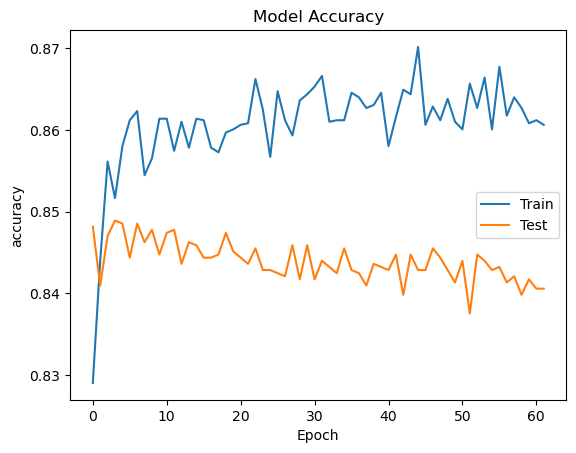

In [55]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc=5)


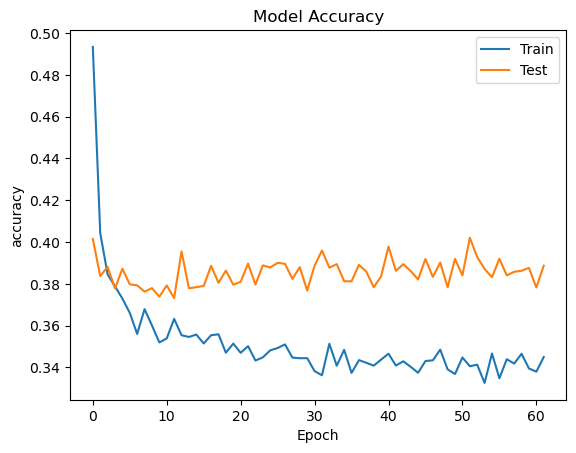

In [56]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc=0)


# Making the prediction and evaluating the model

### Predicting The test set results 

In [57]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 785us/step


#### Make the confusion matrix

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1572,   23],
       [ 267,  138]], dtype=int64)

# Calculate the Accuracy

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
score = accuracy_score(y_pred,y_test)

In [62]:
score

0.855

## Get The Weights 

In [63]:
classifier.get_weights()

[array([[-0.11262888,  0.05568458,  0.21171887,  0.3589546 , -0.03710062,
         -0.02315269,  0.0258396 , -0.12167898,  0.25094542,  0.03997145,
         -0.04065477],
        [ 0.3895307 ,  0.04214291, -0.8235856 , -0.5507904 , -0.91664714,
         -1.2688859 ,  0.18863831, -0.49470636,  0.23216164,  0.81622726,
          0.21186732],
        [-0.36288646, -0.04719105, -0.18652087,  0.43619454, -0.48923084,
         -0.10025955,  0.2939627 , -0.2691572 , -0.41660577,  0.07351907,
         -0.06551845],
        [ 0.3210905 , -0.94023764,  0.03855507, -0.6397557 , -0.2996725 ,
         -0.4675721 , -0.07084351,  1.5450777 , -0.4215324 , -0.02229543,
          0.2051354 ],
        [-0.23309647, -1.1989406 ,  0.2766515 ,  0.03450326,  0.5331139 ,
          0.0542949 , -0.07924668,  0.55246747,  0.2781075 ,  0.52558047,
          1.286507  ],
        [ 0.10075321,  0.03656494, -0.17915757, -0.16557837,  0.3587323 ,
          0.05624447,  0.29906002, -0.29247624, -0.3923885 ,  0.1197342